# ASSIGNMENT 2
Author: Mostafa Abdelazim, 
ID: 900203676

Abstract: The code aims analyze the confidence intervals for 2 data sets. The first one is for matches, and their win/lose probability for different reasons, like home/away or friendly/official matches. The second data set is for reported covid cases in all countries in 20202 and 2021. In both data sets, all the analyzed data are given and graphed throughout the code. 

# Statistical Comparison Between the Winning Countries in Football based on Several Terms.

In [19]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
from scipy.stats import norm,t
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [20]:
df=pd.read_csv("results.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [21]:
x=df['home_score']-df['away_score']
conditions = [
    (x<0),
    (x>0),
    (x==0)
    ]

In [22]:
values= ['win','lose','draw']

In [23]:
df['result'] = np.select(conditions, values)

In [24]:
x=df['result'].value_counts()

In [25]:
x=np.array(x)

In [26]:
x

array([21009, 12224,  9955], dtype=int64)

In [27]:
conditions = [
    (df['tournament']=='Friendly'),
    (df['tournament']!='Friendly')
    ]

In [28]:
values=['Friendly','Official']

In [29]:
df['typematch'] = np.select(conditions, values)

In [30]:
x=pd.crosstab(df['typematch'],df['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,4329,8141,4806,17276
Official,5626,12868,7418,25912
All,9955,21009,12224,43188


In [31]:
x=np.array(x)
x

array([[ 4329,  8141,  4806, 17276],
       [ 5626, 12868,  7418, 25912],
       [ 9955, 21009, 12224, 43188]], dtype=int64)

In [32]:
CI_win_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_win_friendly

(0.27150736589666685, 0.2848714254902283)

In [33]:
CI_win_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_win_official

(0.2807729187467606, 0.29178033843138085)

In [34]:
ci_win = {}
ci_win['Typematch'] = ['Friendly','Official']
ci_win['lb'] = [CI_win_friendly[0],CI_win_official[0]]
ci_win['ub'] = [CI_win_friendly[1],CI_win_official[1]]
df_ci3= pd.DataFrame(ci_win)
df_ci3

,Typematch,lb,ub
0,Friendly,0.271507,0.284871
1,Official,0.280773,0.291780


([<matplotlib.axis.YTick at 0x1e41c48ab20>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

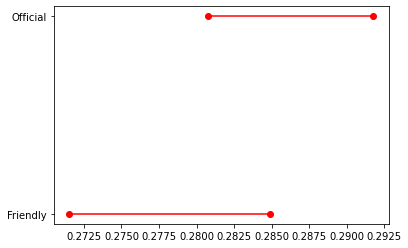

In [35]:
for lb,ub,y in zip(df_ci3['lb'],df_ci3['ub'],range(len(df_ci3))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci3)),list(df_ci3['Typematch']))

In [36]:
CI_lose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_lose_friendly

(0.46378827932197364, 0.47867525390331)

In [37]:
CI_lose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_lose_official

(0.4905161288707065, 0.5026916513083611)

In [38]:
ci_lose = {}
ci_lose['Typematch'] = ['Friendly','Official']
ci_lose['lb'] = [CI_lose_friendly[0],CI_lose_official[0]]
ci_lose['ub'] = [CI_lose_friendly[1],CI_lose_official[1]]
df_ci4= pd.DataFrame(ci_lose)
df_ci4

,Typematch,lb,ub
0,Friendly,0.463788,0.478675
1,Official,0.490516,0.502692


([<matplotlib.axis.YTick at 0x1e41c4ccbe0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

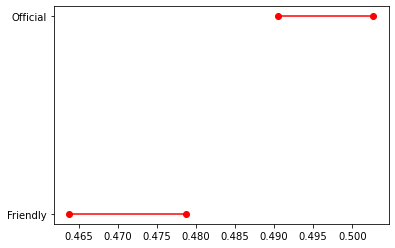

In [39]:
for lb,ub,y in zip(df_ci4['lb'],df_ci4['ub'],range(len(df_ci4))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci4)),list(df_ci4['Typematch']))

In [40]:
df['country'].value_counts()

United States          1237
France                  818
Malaysia                744
England                 717
Sweden                  655
                       ... 
Belgian Congo             1
Portuguese Guinea         1
Bohemia and Moravia       1
Lautoka                   1
Mali Federation           1
Name: country, Length: 267, dtype: int64

In [41]:
dfus=df[df['country']=='United States']

In [42]:
conditions = [
    (dfus['tournament']=='Friendly'),
    (dfus['tournament']!='Friendly')
    ]

In [43]:
values=['Friendly','Official']

In [44]:
dfus['Typematch'] = np.select(conditions, values)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_3708/327193532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['Typematch'] = np.select(conditions, values)


In [45]:
x=pd.crosstab(dfus['typematch'],dfus['result'],margins=True)
x

result,draw,lose,win,All
typematch,,,,
Friendly,180,247,226,653
Official,114,315,155,584
All,294,562,381,1237


In [46]:
x=np.array(x)
x

array([[ 180,  247,  226,  653],
       [ 114,  315,  155,  584],
       [ 294,  562,  381, 1237]], dtype=int64)

In [47]:
CI_uswin_friendly=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_friendly

(0.22959939266607973, 0.30122252514213943)

In [48]:
CI_uswin_official=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_official

(0.3096072474351973, 0.38258264536725295)

In [49]:
ci_uswin = {}
ci_uswin['Typematch'] = ['Friendly','Official']
ci_uswin['lb'] = [CI_uswin_friendly[0],CI_uswin_official[0]]
ci_uswin['ub'] = [CI_uswin_friendly[1],CI_uswin_official[1]]
df_cius= pd.DataFrame(ci_uswin)
df_cius

,Typematch,lb,ub
0,Friendly,0.229599,0.301223
1,Official,0.309607,0.382583


([<matplotlib.axis.YTick at 0x1e41c57bf40>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

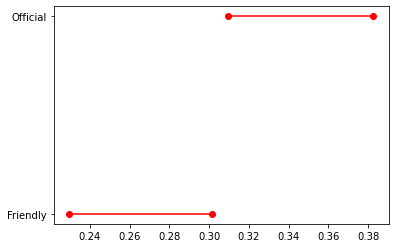

In [50]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [51]:
CI_uslose_friendly=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_friendly

(0.3410587617395715, 0.4154496609250533)

In [52]:
CI_uslose_official=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_official

(0.4989576113893054, 0.5798095118983658)

In [53]:
ci_uslose = {}
ci_uslose['Typematch'] = ['Friendly','Official']
ci_uslose['lb'] = [CI_uslose_friendly[0],CI_uslose_official[0]]
ci_uslose['ub'] = [CI_uslose_friendly[1],CI_uslose_official[1]]
df_cius= pd.DataFrame(ci_uslose)
df_cius

,Typematch,lb,ub
0,Friendly,0.341059,0.41545
1,Official,0.498958,0.57981


([<matplotlib.axis.YTick at 0x1e41c5dcd00>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

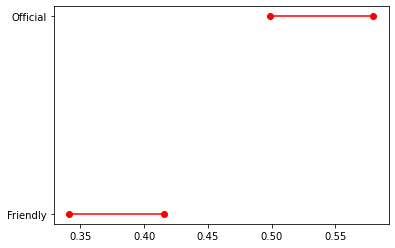

In [54]:
for lb,ub,y in zip(df_cius['lb'],df_cius['ub'],range(len(df_cius))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_cius)),list(df_cius['Typematch']))

In [55]:
dfus['home']=(dfus['home_team']=='United States')

C:\Users\lenovo\AppData\Local\Temp/ipykernel_3708/3054155073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfus['home']=(dfus['home_team']=='United States')


In [56]:
x=pd.crosstab(dfus['home'],dfus['result'],margins=True)
x

result,draw,lose,win,All
home,,,,
False,203,333,290,826
True,91,229,91,411
All,294,562,381,1237


In [57]:
x=np.array(x)
x

array([[ 203,  333,  290,  826],
       [  91,  229,   91,  411],
       [ 294,  562,  381, 1237]], dtype=int64)

In [58]:
CI_uswin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_uswin_home

(0.1812708525133201, 0.26155153191490377)

In [59]:
CI_uswin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_uswin_away

(0.31853895723001224, 0.3836402195254357)

In [60]:
ci_uswin = {}
ci_uswin['home'] = ['Yes','No']
ci_uswin['lb'] = [CI_uswin_home[0],CI_uswin_away[0]]
ci_uswin['ub'] = [CI_uswin_home[1],CI_uswin_away[1]]
df_ci= pd.DataFrame(ci_uswin)
df_ci

,home,lb,ub
0,Yes,0.181271,0.261552
1,No,0.318539,0.383640


([<matplotlib.axis.YTick at 0x1e41c9897f0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

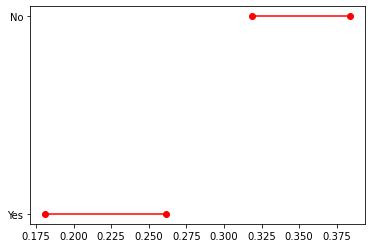

In [61]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [62]:
CI_uslose_home=proportion_confint(count=x[1,1],nobs=x[1,3],alpha=(1-.95))
CI_uslose_home

(0.5091557759095878, 0.6051994552339645)

In [63]:
CI_uslose_away=proportion_confint(count=x[0,1],nobs=x[0,3],alpha=(1-.95))
CI_uslose_away

(0.3696955835778047, 0.4365998159379338)

In [64]:
ci_uslose = {}
ci_uslose['home'] = ['Yes','No']
ci_uslose['lb'] = [CI_uslose_home[0],CI_uslose_away[0]]
ci_uslose['ub'] = [CI_uslose_home[1],CI_uslose_away[1]]
df_ci= pd.DataFrame(ci_uslose)
df_ci

,home,lb,ub
0,Yes,0.509156,0.605199
1,No,0.369696,0.436600


([<matplotlib.axis.YTick at 0x1e41c9e9ca0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

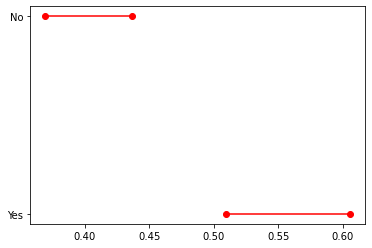

In [65]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

# Conclusion for Part 1
The code aims to find the 95% confidence interval for won/lost matches for both match types, Friendly and Official. The first 2 confidence intervals were for won/lost matches in friendly and offical matches for all countries in general without choosing a specific one. The confidence interval for winning in both both matches types were totally different. The range of the interval for winning an official match is less than a friendly match. Which led to a high margin of error  for winning a friendly match, and the propability of winning a friendly match is high than winning an official match. Moreover, for losing, it's the same thing. The probability of losing a match is higher in friendly matches and the MOE is also bigger. The first 2 confidence intervals were for won/lost matches in friendly and offical matches for the most common country, United States. The range of the interval for winning an official match is more than a friendly match. Which led to a high margin of error  for winning an official match, and the propability of winning an official match is higher than winning a friendly match. Moreover,for losing, it's the same thing. The probability of losing a match is higher in official matches and the MOE is also bigger. I also did the same thing for winning and lossing in both home and away matches

#  Analysis of CoronaVirus Pandemic Over the Period Between 2020 and 2021.



In [66]:
df1=pd.read_csv('covid_data.csv',encoding='latin-1')
df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


In [67]:
from pandas.api.types import CategoricalDtype
cats=['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df1['month'] = df1['month'].astype(cat_type)

In [68]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error


def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

In [69]:
df1['date'][0]

df1['date'] = pd. to_datetime(df1['date'],format='%Y-%m-%d')

df1['date'][0]

df1['year'] = pd. DatetimeIndex(df1['date']). year

df1['year'][0]


2020

In [70]:
df1['totdeaths'] = df1.groupby(['iso3c'])['ddeaths'].cumsum()
df1['totcases'] = df1.groupby(['iso3c'])['dcases'].cumsum()
ratio=df1['totdeaths']/df1['totcases']

df1['ratio']=ratio


df1

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year,totdeaths,totcases,ratio
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb,2020,0,5,0.000000
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb,2020,0,5,0.000000
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb,2020,0,5,0.000000
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb,2020,0,5,0.000000
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb,2020,0,5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec,2021,4908,205455,0.023888
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec,2021,4940,207554,0.023801
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec,2021,4940,207554,0.023801
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec,2021,4997,211734,0.023600


In [71]:
cy=df1.groupby(['continent','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

cy=cy.reset_index()

cy= pd.DataFrame(cy)

cy

continent  year     ratio                             \
                                        mean       std   size get_ci_lb   
0                     Africa  2020  0.026687  0.036548  15332  0.026109   
1                     Africa  2021  0.021921  0.013963  19345  0.021725   
2                       Asia  2020  0.020696  0.042093  14313  0.020006   
3                       Asia  2021  0.018641  0.032137  16790  0.018155   
4                     Europe  2020  0.036268  0.037584  13408  0.035632   
5                     Europe  2021  0.018684  0.009132  15695  0.018541   
6   North America(continent)  2020  0.031719  0.037452   6834  0.030831   
7   North America(continent)  2021  0.020597  0.016344   8395  0.020247   
8                    Oceania  2020  0.014086  0.017041   1466  0.013213   
9                    Oceania  2021  0.024448  0.060558   3280  0.022375   
10  South America(continent)  2020  0.041318  0.048541   3605  0.039733   
11  South America(continent)  2021  0.032145  0.021665   4380  0.031504   

              
   get_ci_ub  
0   0.027266  
1   0.022118  
2   0.021385  
3   0.019127  
4   0.036904  
5   0.018827  
6   0.032607  
7   0.020946  
8   0.014959  
9   0.026521  
10  0.042903  
11  0.032787

In [72]:
ry=df1.groupby(['region','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

ry=ry.reset_index()

ry= pd.DataFrame(ry)

ry

region  year     ratio                             \
                                          mean       std   size get_ci_lb   
0          East Asia & Pacific  2020  0.018069  0.031493   6301  0.017291   
1          East Asia & Pacific  2021  0.017975  0.038763   8755  0.017163   
2        Europe & Central Asia  2020  0.033002  0.035703  15743  0.032445   
3        Europe & Central Asia  2021  0.017664  0.008990  18615  0.017535   
4    Latin America & Caribbean  2020  0.034462  0.042633   9750  0.033615   
5    Latin America & Caribbean  2021  0.024916  0.019643  12045  0.024565   
6   Middle East & North Africa  2020  0.030629  0.055039   6415  0.029282   
7   Middle East & North Africa  2021  0.027900  0.045152   7665  0.026889   
8        North America(region)  2020  0.043134  0.027639    689  0.041067   
9        North America(region)  2021  0.018626  0.003123    730  0.018399   
10                  South Asia  2020  0.012519  0.014289   2541  0.011963   
11                  South Asia  2021  0.015800  0.013016   2920  0.015328   
12          Sub-Saharan Africa  2020  0.025935  0.037687  13519  0.025300   
13          Sub-Saharan Africa  2021  0.021236  0.013592  17155  0.021033   

              
   get_ci_ub  
0   0.018846  
1   0.018787  
2   0.033560  
3   0.017793  
4   0.035308  
5   0.025266  
6   0.031976  
7   0.028911  
8   0.045201  
9   0.018853  
10  0.013075  
11  0.016273  
12  0.026570  
13  0.021439

In [73]:
iy=df1.groupby(['income','year']).agg({"ratio": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})

iy=iy.reset_index()

iy= pd.DataFrame(iy)

iy

income  year     ratio                                     
                                  mean       std   size get_ci_lb get_ci_ub
0          High income  2020  0.030809  0.036505  17865  0.030274  0.031344
1          High income  2021  0.014761  0.008120  20937  0.014651  0.014871
2           Low income  2020  0.034335  0.049796   8351  0.033267  0.035403
3           Low income  2021  0.030097  0.038303  10585  0.029367  0.030826
4  Lower middle income  2020  0.024933  0.041938  12879  0.024209  0.025658
5  Lower middle income  2021  0.023069  0.029529  16653  0.022620  0.023517
6  Upper middle income  2020  0.026463  0.033877  15863  0.025936  0.026990
7  Upper middle income  2021  0.020924  0.017922  19710  0.020673  0.021174

In [74]:
cy20=cy[(cy['year']==2020)]
cy21=cy[(cy['year']==2021)]

cy20.columns
cy20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
cy21.columns
cy21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Continents 2020')

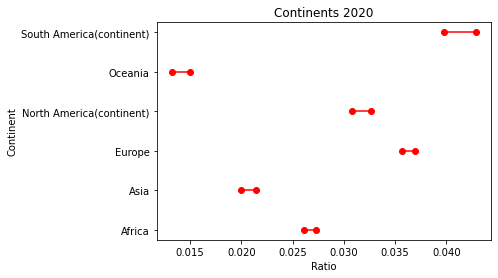

In [75]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(cy20['get_ci_lb'],cy20['get_ci_ub'],range(len(cy))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(cy20)),list(cy20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents 2020")

Text(0.5, 1.0, 'Continents 2021')

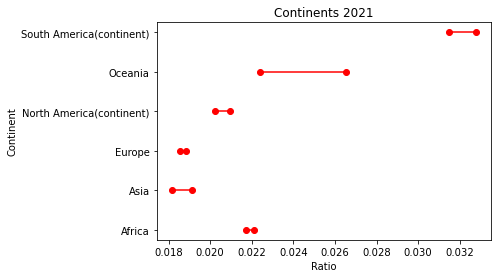

In [76]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(cy21['get_ci_lb'],cy21['get_ci_ub'],range(len(cy))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(cy21)),list(cy21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Continent")
plt.title("Continents 2021")

In [77]:
ry20=ry[(ry['year']==2020)]
ry21=ry[(ry['year']==2021)]

ry20.columns
ry20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
ry21.columns
ry21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Regions 2020')

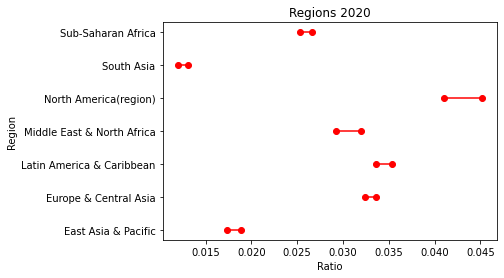

In [78]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(ry20['get_ci_lb'],ry20['get_ci_ub'],range(len(ry20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(ry20)),list(ry20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions 2020")

Text(0.5, 1.0, 'Regions 2021')

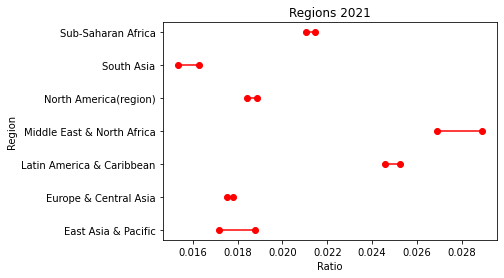

In [79]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(ry21['get_ci_lb'],ry21['get_ci_ub'],range(len(ry21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(ry21)),list(ry21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Region")
plt.title("Regions 2021")

In [80]:
iy20=iy[(iy['year']==2020)]
iy21=iy[(iy['year']==2021)]

iy20.columns
iy20.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']
iy21.columns
iy21.columns=['continent','year','mean','std','size','get_ci_lb','get_ci_ub']

Text(0.5, 1.0, 'Income 2020')

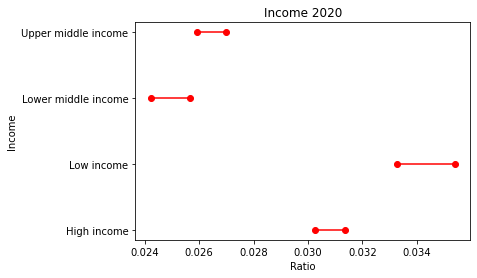

In [81]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(iy20['get_ci_lb'],iy20['get_ci_ub'],range(len(iy20))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(iy20)),list(iy20['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income 2020")

Text(0.5, 1.0, 'Income 2021')

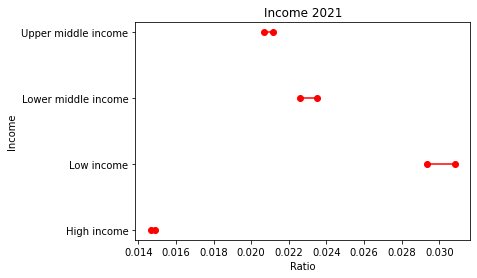

In [82]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(iy21['get_ci_lb'],iy21['get_ci_ub'],range(len(iy21))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(iy21)),list(iy21['continent']))
plt.xlabel("Ratio")
plt.ylabel("Income")
plt.title("Income 2021")

# Conclusion for Part 2
This code aims to analyze the ratio between cases and deaths in 2020 and 2021, and compare them with respect to 3 aspects, continent, region, and income. Throughout all the aspects, the ratio in 2020 is below 0.05 for all parts in the graph. While in 2021, the ratio decreases in all aspects and the parts within them.
For continent, South America had the highest ratio, however in 2020 the margin of error was higher than 2021. It had the highest in both years. This might be reason why they got infected the most.
For income, the low income class had the highest ratio in both 2020 and 2021, but higher margin or error in 2020. It had the highest in both years. This might be reason why they got infected the most.
For region, North America had the highest ratio in 2020, however in 2021, Middle East & North Africa had the highest ratio with a larger margin of error.